<a href="https://colab.research.google.com/github/jae-hyuck/dl13/blob/main/notebook/ch08_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08 : DNN 심층신경망 (deep nural network)

In [ ]:
 # 손실함수
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

In [ ]:
# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

## 손실함수 
 - BCE
 - CCE (sCCE)
 - MSE

In [4]:
# import numpy as np
import tensorflow as tf

# BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.8], [0.3], [0.5], [0.9]]   
# y_pred = [[1.0], [0.3], [0.5], [1.0]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

import numpy as np
custom_loss_function(np.array(y_true), np.array(y_pred)).numpy()


0.3445814
1.936381
9


9

In [8]:
# SparseCategoricalCrossentropy
y_true = [1, 2, 0] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())      

1.936381


# Encoding
 - LabelEncoder
 - OneHotEncoder

In [9]:
# LabelEncoder
import numpy as np
X = np.array([['Korea', 44, 7200],
		      ['Japan', 27, 4800],
	          ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)


[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [10]:
# OneHotEncoder
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


## ONE - hot encoding using keras

In [12]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [14]:
#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

print(y_train[:10])

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]
# y_train[:10]


(60000, 28, 28) (60000,)
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 데이터 정규화
 - minmax
 - standard

In [16]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [17]:
# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Nomalization

In [18]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## Overfiting 처리 : IMDB 데이터 사용


In [19]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000) # 가장 빈번하게 나오는 100개의 단어


17464789/17464789 [==============================] - 0s 0us/step


In [26]:
print(len(train_data[0]),np.unique(train_data[0]).size) # 첫 번째 문장의 길이와 중복없이 나오는 단어의 수
# print(max(train_data.max()))
print(train_data.shape,train_labels.shape)
train_labels[:10] # 1 - 긍정 0 - 부정

218 97
(25000,) (25000,)


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
train_data[0], max(train_data.max())

Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5620 - accuracy: 0.7208 - val_loss: 0.4074 - val_accuracy: 0.8290
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.3555 - accuracy: 0.8502 - val_loss: 0.3401 - val_accuracy: 0.8556
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.8672 - val_loss: 0.3307 - val_accuracy: 0.8609
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.3076 - accuracy: 0.8728 - val_loss: 0.3283 - val_accuracy: 0.8620
Epoch 5/20
49/49 [==============================] - 0s 6ms/step - loss: 0.3022 - accuracy: 0.8748 - val_loss: 0.3295 - val_accuracy: 0.8609
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.8779 - val_loss: 0.3334 - val_accuracy: 0.8588
Epoch 7/20
49/49 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.8794 - val_loss: 0.3300 - val_accuracy: 0.8594
Epoch 8/20
49/49 [=

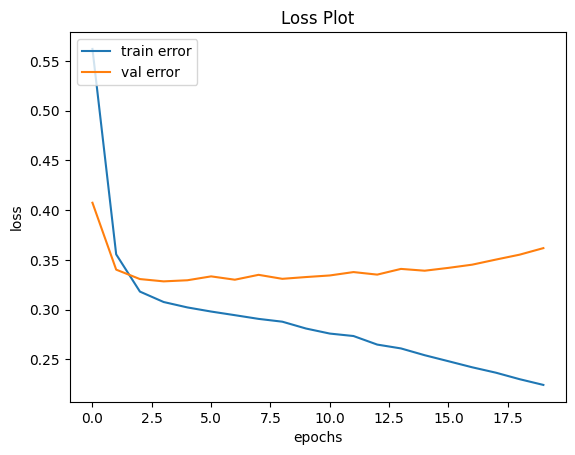

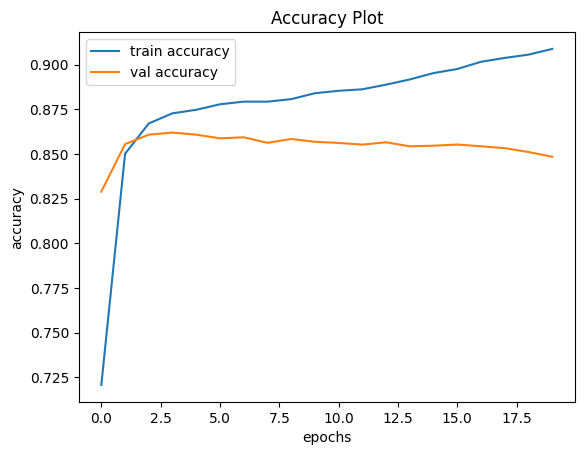

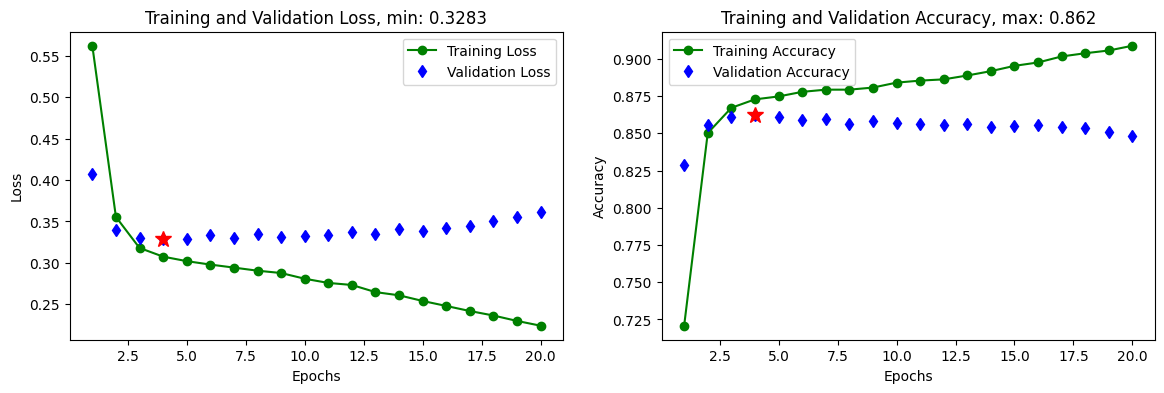

In [27]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0].shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 가중치 규제
 - L1
 - L2

Epoch 1/20
49/49 - 1s - loss: 0.6188 - accuracy: 0.7040 - val_loss: 0.4695 - val_accuracy: 0.8217 - 996ms/epoch - 20ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4099 - accuracy: 0.8474 - val_loss: 0.3839 - val_accuracy: 0.8552 - 313ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3635 - accuracy: 0.8666 - val_loss: 0.3688 - val_accuracy: 0.8613 - 331ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3490 - accuracy: 0.8724 - val_loss: 0.3646 - val_accuracy: 0.8617 - 249ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3419 - accuracy: 0.8737 - val_loss: 0.3646 - val_accuracy: 0.8598 - 227ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3389 - accuracy: 0.8748 - val_loss: 0.3635 - val_accuracy: 0.8599 - 255ms/epoch - 5ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3323 - accuracy: 0.8777 - val_loss: 0.3583 - val_accuracy: 0.8609 - 304ms/epoch - 6ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3304 - accuracy: 0.8773 - val_loss: 0.3580 - val_accuracy: 0.8601 - 321ms/epoch - 7ms/step
Epoch 9/20
49/4

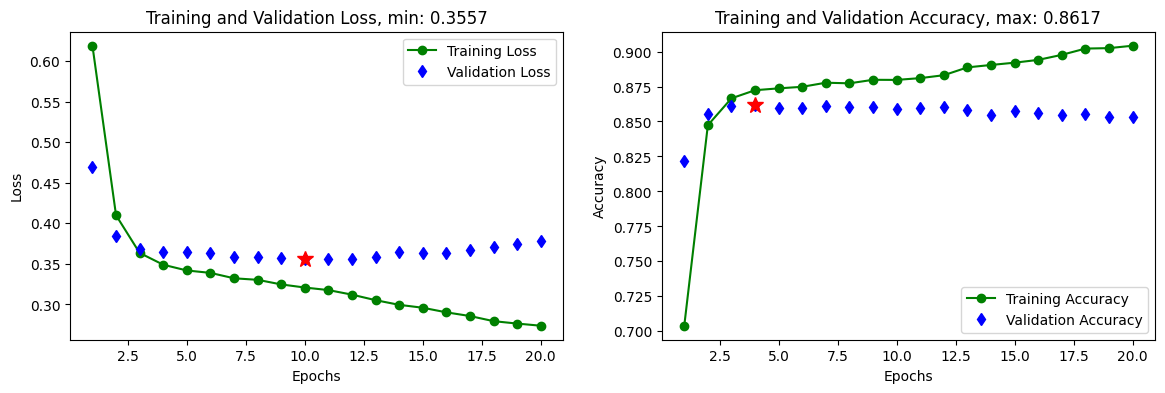

In [28]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6913 - accuracy: 0.5419 - val_loss: 0.6686 - val_accuracy: 0.6565 - 1s/epoch - 24ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6223 - accuracy: 0.6541 - val_loss: 0.5078 - val_accuracy: 0.8126 - 324ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5038 - accuracy: 0.7680 - val_loss: 0.3991 - val_accuracy: 0.8352 - 337ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4367 - accuracy: 0.8168 - val_loss: 0.3553 - val_accuracy: 0.8524 - 266ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4035 - accuracy: 0.8370 - val_loss: 0.3364 - val_accuracy: 0.8566 - 327ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3796 - accuracy: 0.8498 - val_loss: 0.3299 - val_accuracy: 0.8581 - 329ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3623 - accuracy: 0.8567 - val_loss: 0.3242 - val_accuracy: 0.8590 - 345ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3548 - accuracy: 0.8607 - val_loss: 0.3235 - val_accuracy: 0.8604 - 408ms/epoch - 8ms/step
Epoch 9/20
49/49 -

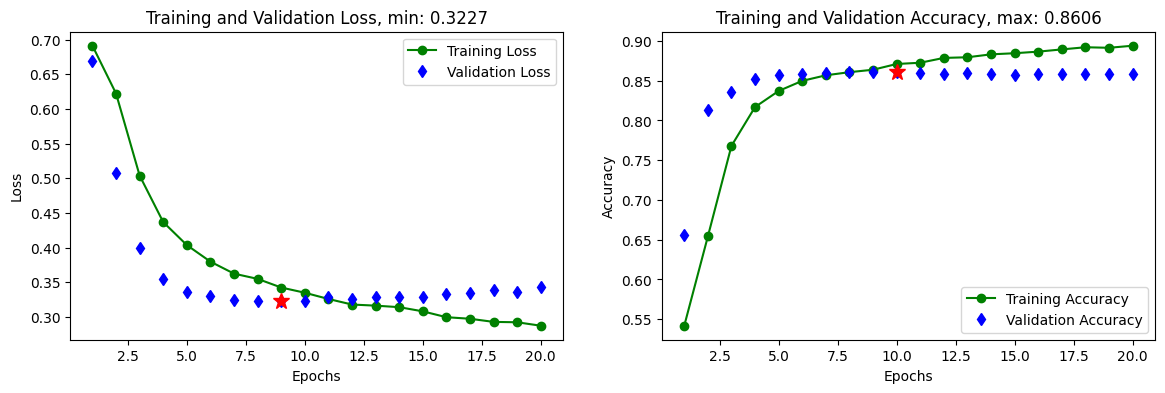

In [29]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DNN 응용의 예
 - MNIST
 - Fashion MNIST
 - Titanic survival predction

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2183 - accuracy: 0.9352 - val_loss: 0.1003 - val_accuracy: 0.9675
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0983 - accuracy: 0.9693 - val_loss: 0.0830 - val_accuracy: 0.9723
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0681 - val_accuracy: 0.9791
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0533 - accuracy: 0.9825 - val_loss: 0.0588 - val_accuracy: 0.9815
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0627 - val_accuracy: 0.9817
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0303 - accuracy: 0.9899 - v

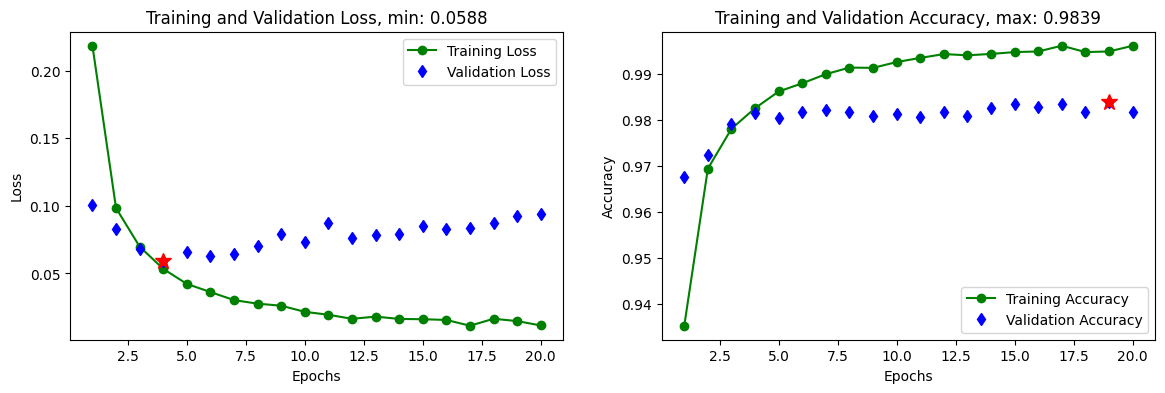

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### Fashion MNIST

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5032 - accuracy: 0.8240 - val_loss: 0.4379 - val_accuracy: 0.8438
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3774 - accuracy: 0.8643 - val_loss: 0.3796 - val_accuracy: 0.8676
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8773 - val_loss: 0.3778 - val_accuracy: 0.8662
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3149 - accuracy: 0.8850 - val_loss: 0.3503 - val_accuracy: 0.8779
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8910 - val_loss: 0.3442 - val_accuracy: 0.8777
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.8967 - val_loss: 0.3328 - val_accuracy: 0.8799
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - los

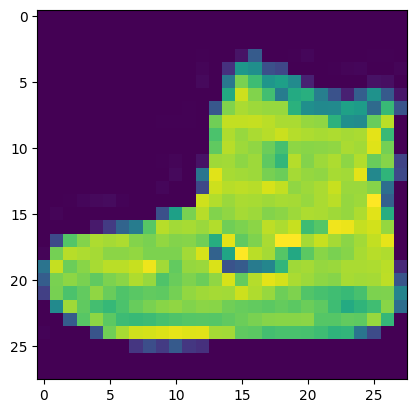

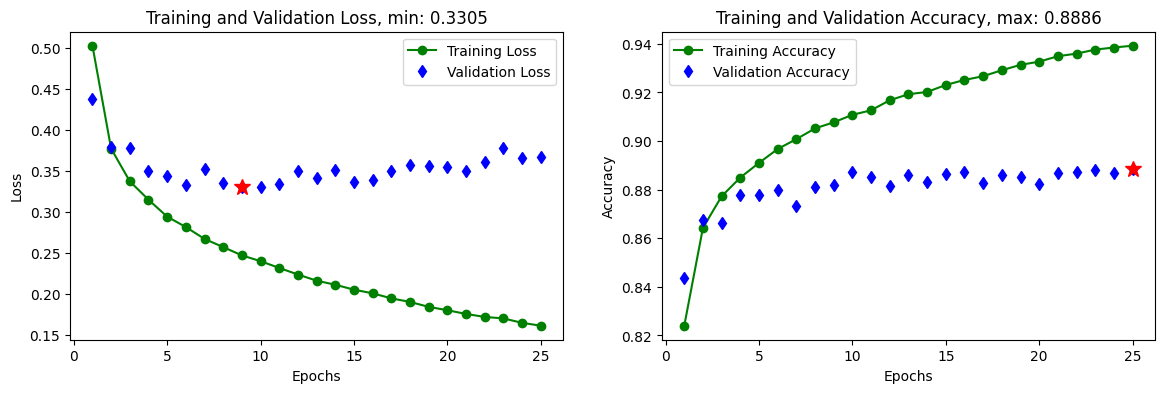

In [31]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# print(train_images.shape,train_labels.shape)
# print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 타이타닉 생존 예측

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')
# print(train.shape)
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
# print(train.shape)
# train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)
train.shape
# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

train.head()
# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 
target.shape
# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.shape
train.head()
# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)



Epoch 1/30
891/891 [==============================] - 2s 1ms/step - loss: 0.6010 - accuracy: 0.6543
Epoch 2/30
891/891 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7868
Epoch 3/30
891/891 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.7890
Epoch 4/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4968 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4873 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4817 - accuracy: 0.7845
Epoch 7/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4769 - accuracy: 0.7856
Epoch 8/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4711 - accuracy: 0.7845
Epoch 9/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.7868
Epoch 10/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4651 - accuracy: 0.7767

In [34]:
test.shape, test.columns

((418, 11),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [38]:
######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test = pd.read_csv("test.csv", sep=',')
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
test.isna().sum()
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
print('live : ',np.where(pred_test >= 0.5)[0].size)  # 152
# Dead
print('die : ', np.where(pred_test < 0.5)[0].size)   # 266




418/418 [==============================] - 1s 1ms/step
live :  80
die :  338
